# **Predicting Gold Content in Gold Ore Using Machine Learning**

## **Introduction**

The objective of this project is to develop a machine learning model capable of predicting the gold content within gold ore samples. By leveraging advanced data analysis techniques and machine learning algorithms, this project aims to enhance the accuracy of gold content predictions, which is critical for optimizing mining processes and resource management.


### **Goal**

The primary goal of this project is to identify the most effective machine learning model for predicting gold content in gold ore. This involves selecting the best model based on its performance and ability to accurately forecast gold content from the available data.

### **Project Stages**

### 1. Data Loading and Preparation

- **Data Acquisition**: Load the datasets.
- **Initial Analysis**: Examine the data characteristics.
- **Error Calculation**: Compute the Mean Absolute Error (MAE).
- **Data Cleaning**: Address missing columns and anomalies.

### 2. Exploratory Data Analysis (EDA)

- **Feature Analysis**: Investigate concentration changes in Au, Ag, and Pb.
- **Distribution Study**: Analyze feature distributions in training and test datasets.
- **Abnormality Detection**: Identify and handle anomalies in the data.

### 3. Model Development

- **sMAPE Calculation**: Develop a function to calculate symmetric Mean Absolute Percentage Error (sMAPE).
- **Model Training**: Train various machine learning models and evaluate them using cross-validation.
- **Model Evaluation**: Select and test the best model using the test dataset.


### **Dataset Description**

The datasets for this project are provided in three files:
- `gold_recovery_train.csv`: Training data
- `gold_recovery_test.csv`: Test data
- `gold_recovery_full.csv`: Complete dataset with all features

These files are indexed by date and time of acquisition. Some features might be missing in the test set due to timing differences in measurements. The source dataset provides a comprehensive view of all features.



## **Data Loadment**

Load the libraries that needed in this project

In [1]:
# Libraries for data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Libraries for statistic test
from scipy.stats import levene
from sklearn.metrics import mean_absolute_error

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for machine learning development
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for metric
from sklearn.model_selection import cross_validate

In [2]:
# Path for training dataset
path0 = '/content/gold_recovery_train.csv'

# Path for test dataset
path1 = '/content/gold_recovery_test.csv'

#Path for whole source of dataset
path2 = '/content/gold_recovery_full.csv'

In [3]:
# Loading training dataset

train = pd.read_csv(path0)
train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [4]:
# Loading test dataset

test = pd.read_csv(path1)
test.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [5]:
# Loading source dataset

source = pd.read_csv(path2)
source.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


### **Data Checking**

Study general information of each data

#### **Training Dataset**

In [6]:
# Understand the number of columns and rows

train.shape

(16860, 87)

In [7]:
# Understand the general information regarding the columns content

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [8]:
# Check missing value

train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [9]:
# Check duplicated value

train.duplicated().sum()

0

#### **Test Dataset**

In [10]:
# Understand the number of columns and rows

test.shape

(5856, 53)

In [11]:
# Understand the general information regarding the columns content

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [12]:
# Check missing value

test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [13]:
# Check duplicated value

train.duplicated().sum()

0

#### **Source Dataset**

In [14]:
# Understand the number of columns and rows

source.shape

(22716, 87)

In [15]:
16860 + 5856

22716

In [16]:
# Understand the general information regarding the columns content

source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [17]:
# Check missing value

source.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [18]:
# Check duplicated value

source.duplicated().sum()

0

### **Mean Absolut Error (MEA) Calculation**

In this case we will check whether the value in column rougher.output.recovery is well calculated by comparing with the manual calculation of output process of below and find the mean absolut error value.

Output = (C x (F - T)) / (F x (C - T))

Where:

- C is the percentage of gold in the concentrate right after the flotation process (to determine the recovery of the rough concentrate) or after purification (to determine the recovery of the final concentrate).
- F is the percentage of gold in the feed before the flotation process (to determine the recovery of the rough concentrate) / in the concentrate right after the flotation process (to determine the recovery of the final concentrate).
- T is the percentage of gold in the rough tailings, right after the flotation process (to determine the recovery of the rough concentrate) / after purification (to determine the recovery of the final concentrate).

Thus:

- C is the value in column 'rougher.output.concentrate_au'.
- F is the value in column 'rougher.input.feed_au'.
- T is the value in column 'final.output.tail_au'.


This calculation will use the train dataset.

In [19]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['final.output.tail_au']

In [20]:
output = (C * (F - T))/(F * (C - T))
output.replace(np.inf, 0)
output

0        0.750881
1        0.738520
2        0.728442
3        0.730246
4        0.713417
           ...   
16855    0.777302
16856    0.730622
16857    0.723617
16858    0.695070
16859    0.739428
Length: 16860, dtype: float64

In [21]:
# MAE Calculation
abs(train['rougher.output.recovery'] - output).replace([np.inf, -np.inf], np.nan).mean()

81.79275230758236

### **Missing column between dataset**

In order to develop machine learning model, the number of column has to be the same.

In [22]:
diff_cols_train = [column for column in train.columns if column not in test.columns]
diff_cols_train

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [23]:
diff_cols_test = [column for column in test.columns if column not in train.columns]
diff_cols_test

[]

**Handling missing value**

The target missing value must be dropped or make sure are values are not empty.

In [24]:
train = train.loc[(~train['rougher.output.recovery'].isnull()) & (~train['final.output.recovery'].isnull())]

**Split data into features and target**

In order to develop machine learning model, the data set should be differentiate between features and target set.



In [25]:
# Differentiate the data into features(X) and target(y).

X_general = train.drop(diff_cols_train, axis=1).drop('date', axis=1)
y_general = train[['final.output.recovery', 'rougher.output.recovery']]

In [26]:
X_general.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [27]:
y_general.head(2)

,final.output.recovery,rougher.output.recovery
0,70.541216,87.107763
1,69.266198,86.843261


### **Data Preparation**

### **Handling missing values**

Both missing value in train set and test set must be filled. In this case the missing value of test set could be fill as well with the mean value.

In [28]:
# Filling missing value with mean value

for col in X_general.columns:
    mean = X_general[col].mean()
    X_general[col] = X_general[col].fillna(mean)
    test[col] = test[col].fillna(mean)

In [29]:
X_general.isnull().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [30]:
test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

#### **Split the dataset into train and validation**

In [31]:
# Train and validation split

X_train, X_val, y_train, y_val = train_test_split(X_general, y_general, test_size=0.25, random_state=12345)

In [32]:
X_train.shape

(10611, 52)

In [33]:
X_val.shape

(3538, 52)

In [34]:
y_train.shape

(10611, 2)

In [35]:
y_val.shape

(3538, 2)

**Insight**

Based on the data given, below are the condition and treatment for each condition:

1. The number of rows each data are:

- Train dataset : 16860 rows and 87 columns
- Test dataset  : 5856 rows and 53 columns
- Source dataset: 22716 rows and 87 columns

2. Missing value are detected in all dataset.
3. No duplicated value has been found in all of dataset.
4. Mean Absolute Error (MAE) has been calculated and the value is 81.79275230758236.
5. The column differences between train and test dataset solved by dropping all columns in train dataset that not exist in test dataset. Meanwhile all columns in test dataset are detected in train dataset. Thus the columns in both dataset are the same.
6. The missing value in both dataset has been filled with mean value of each columns.
7. In order to develop machine learning  model, the train dataset has been splitted into features and target of train set and validation set with validation size of 25% and train set of 75%.

## **Exploratory Data Analysis**

### **Analysis of changement of Au, Ag, and Pb concentrate after each process of purification**

The process of purrification are listed below:

1. Flotation
2. First step of cleansing
3. Second step of cleansing

The material flows before and after each process can be named input and output. From the data given we can conclude that the material are:

In [36]:
input = [column for column in train.columns if 'input' in column]
input

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate']

In [37]:
output = [column for column in train.columns if 'output' in column]
output

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au']

Input Flotation:

1. rougher.input.feed_au
2. rougher.input.feed_ag
3. rougher.input.feed_pb

Output Flotation:

1. rougher.output.concentrate_au
2. rougher.output.concentrate_ag
3. rougher.output.concentrate_pb

Output First step of cleansing:

1. primary_cleaner.output.concentrate_au
2. primary_cleaner.output.concentrate_ag
3. primary_cleaner.output.concentrate_pb

Output Second step of cleansing:

1. final.output.concentrate_au
2. final.output.concentrate_ag
3. final.output.concentrate_pb

#### **Au - Gold**

In [38]:
au_process = train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].reset_index(drop=True).copy()


In [39]:
au_process

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
14144,5.335862,18.603550,32.940215,46.713954
14145,4.838619,18.441436,32.925325,46.866780
14146,4.525061,15.111231,31.856742,46.795691
14147,4.362781,17.834772,30.770892,46.408188


In [40]:
au_flow = au_process.mean().reset_index(name='mean_value')
au_flow.columns = ['flow', 'concentrate']
au_flow

,flow,concentrate
0,rougher.input.feed_au,7.866577
1,rougher.output.concentrate_au,19.439958
2,primary_cleaner.output.concentrate_au,32.386836
3,final.output.concentrate_au,44.003792


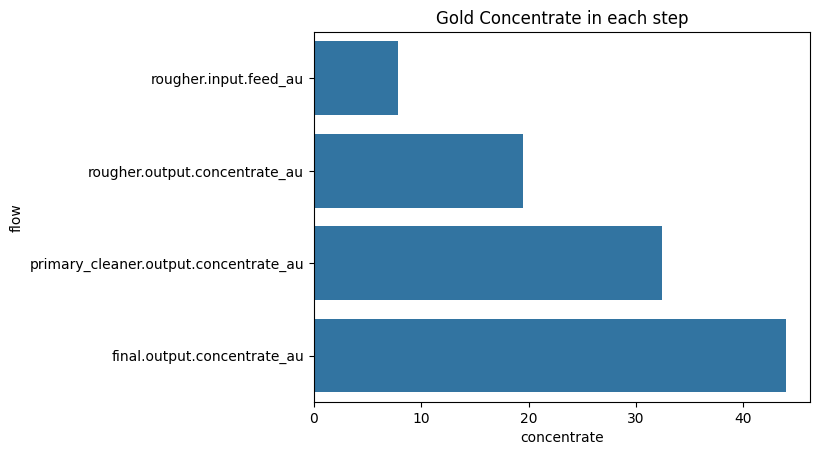

In [41]:
plt.title('Gold Concentrate in each step')
sns.barplot(data=au_flow, x='concentrate', y='flow')
plt.show()

#### **Ag - Silver**

In [42]:
ag_process = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].reset_index(drop=True).copy()


In [43]:
ag_process

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599
...,...,...,...,...
14144,6.091855,11.124896,6.559174,3.224920
14145,6.121323,11.425983,6.612376,3.195978
14146,5.970515,8.523497,7.128896,3.109998
14147,6.048130,11.658799,7.490444,3.367241


In [44]:
ag_flow = ag_process.mean().reset_index(name='mean_value')
ag_flow.columns = ['flow', 'concentrate']
ag_flow

,flow,concentrate
0,rougher.input.feed_ag,8.579195
1,rougher.output.concentrate_ag,11.775812
2,primary_cleaner.output.concentrate_ag,8.200916
3,final.output.concentrate_ag,5.142034


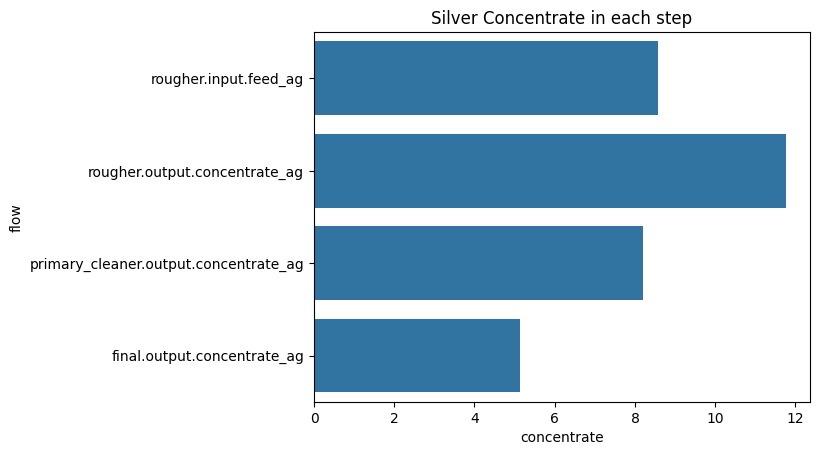

In [45]:
plt.title('Silver Concentrate in each step')
sns.barplot(data=ag_flow, x='concentrate', y='flow')
plt.show()

#### **Pb - Lead**

In [47]:
pb_process = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].reset_index(drop=True).copy()


In [48]:
pb_process

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511
...,...,...,...,...
14144,4.617558,10.984003,12.445966,11.356233
14145,4.144989,10.888213,12.623947,11.349355
14146,4.020002,8.955135,12.633558,11.434366
14147,3.902537,10.655377,12.012378,11.625587


In [49]:
pb_flow = pb_process.mean().reset_index(name='mean_value')
pb_flow.columns = ['flow', 'concentrate']
pb_flow

,flow,concentrate
0,rougher.input.feed_pb,3.522778
1,rougher.output.concentrate_pb,7.664555
2,primary_cleaner.output.concentrate_pb,9.588862
3,final.output.concentrate_pb,10.132960


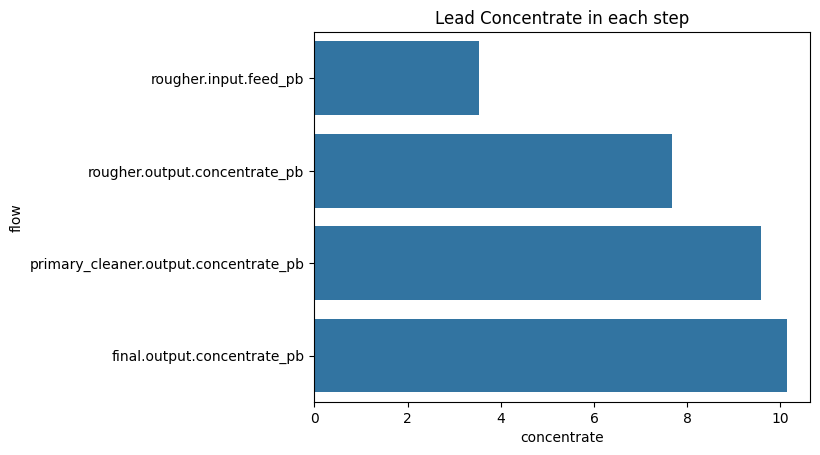

In [50]:
plt.title('Lead Concentrate in each step')
sns.barplot(data=pb_flow, x='concentrate', y='flow')
plt.show()

### **Distribution in train and test dataset**

The hypothesis are formulated as below:

- H0 : Both train and test dataset have the same variance
- H1 : Both train and test dataset have different variance

In order to check the hypothesis, in this case levene test will be use and alpha value set in 5%.

In [51]:
# Variance test
def levene_variance(series1, series2, alpha=0.05):
    p_value_levene = levene(series1, series2).pvalue
    print(f'P-Value: {p_value_levene}')
    print(f'Alpha  : {alpha}')
    if p_value_levene >= alpha:
        print('H0 accepted: Both train and test dataset have the same variance')
    else:
        print('H1 accepted: Both train and test dataset have different variance')

In [52]:
feeds = [column for column in X_general.columns if 'feed' in column]
for column in feeds:
    print(column)
    levene_variance(X_general[column], X_train[column])
    print('--------------------')

primary_cleaner.input.feed_size
P-Value: 0.9854199797793084
Alpha  : 0.05
H0 accepted: Both train and test dataset have the same variance
--------------------
rougher.input.feed_ag
P-Value: 0.5949663623895485
Alpha  : 0.05
H0 accepted: Both train and test dataset have the same variance
--------------------
rougher.input.feed_pb
P-Value: 0.743401703217905
Alpha  : 0.05
H0 accepted: Both train and test dataset have the same variance
--------------------
rougher.input.feed_rate
P-Value: 0.9829153584335604
Alpha  : 0.05
H0 accepted: Both train and test dataset have the same variance
--------------------
rougher.input.feed_size
P-Value: 0.3862088188522872
Alpha  : 0.05
H0 accepted: Both train and test dataset have the same variance
--------------------
rougher.input.feed_sol
P-Value: 0.6676168830729761
Alpha  : 0.05
H0 accepted: Both train and test dataset have the same variance
--------------------
rougher.input.feed_au
P-Value: 0.506172396390824
Alpha  : 0.05
H0 accepted: Both train and t

### **Abnormality distribution of all stages**

#### **Input Floatation**

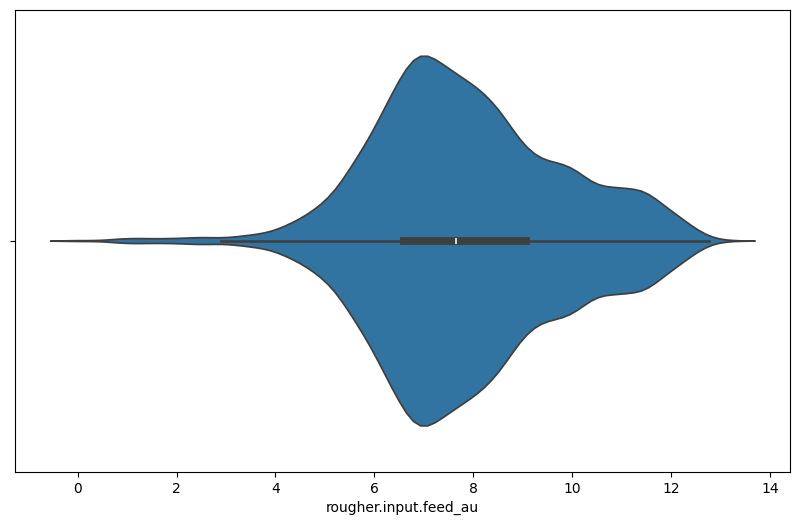

In [53]:
plt.figure(figsize=(10,6))
sns.violinplot(data=au_process, x='rougher.input.feed_au')
plt.show()

#### **Output Floatation**

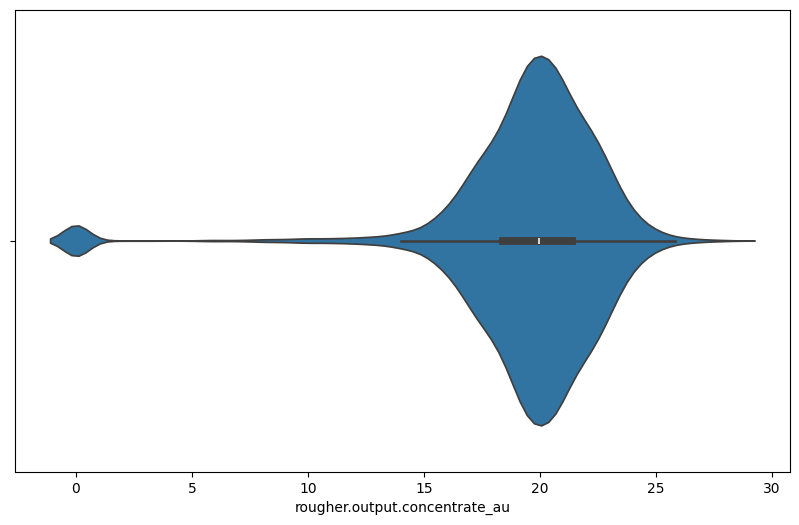

In [54]:
plt.figure(figsize=(10,6))
sns.violinplot(data=au_process, x='rougher.output.concentrate_au')
plt.show()

#### **Output First step of purification**

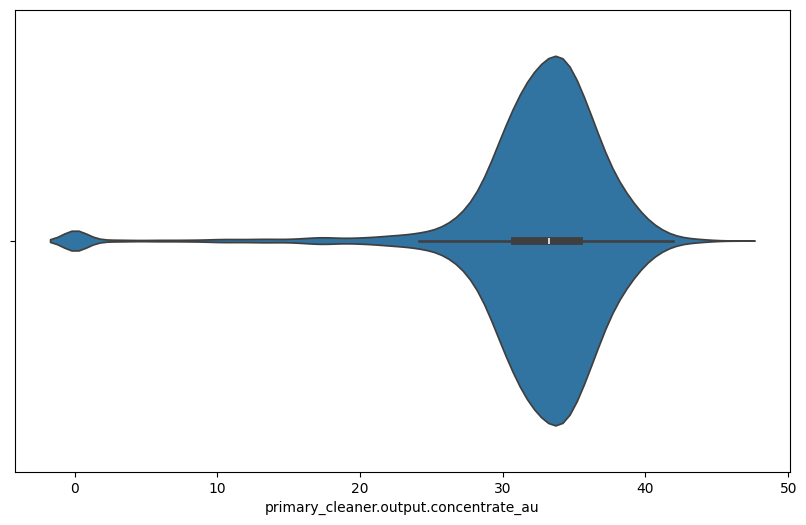

In [55]:
plt.figure(figsize=(10,6))
sns.violinplot(data=au_process, x='primary_cleaner.output.concentrate_au')
plt.show()

#### **Output Second step of purification**

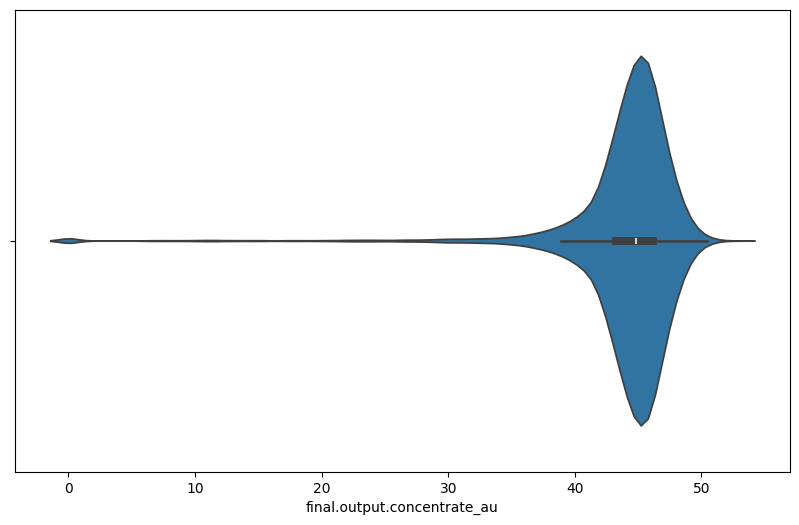

In [56]:
plt.figure(figsize=(10,6))
sns.violinplot(data=au_process, x='final.output.concentrate_au')
plt.show()

### **Summary**

Based on the exploratory data analysis, it summerised as follow:

1. The concentration of Au and Pb from input process, flotation, first step of purrification and second step of purrification tend to increased.
2. The concentration of Ag from input process, flotation, first step of purrification and second step of purrification tend to decreased.
3. Based on the levene test, all value tested both in train and test data set have the same variance.
4. The distribution can be written as below:

- Input flotation process shows normal distribution at 6-8 point of concentration.
- Output of flotation process shows that there is some gold ore that contain no gold, but the distribution is relatively normal with mostly have 20 point concentration after this process.
- Output of first step of purification process shows that there is some gold ore that contain no gold, but the distribution is relatively normal with mostly have 33 point concentration after this process.
- Output of second step of purification process shows that there is some gold ore that contain no gold, but the distribution is relatively normal with mostly have 46 point concentration after this process.

## **Machine Learning Model Development**

### **sMAPE Calculation**

sMAPE (symmetric mean absolute percentage error) is an accuracy calculation based on percentage (or relative) errors. The formula can be define as below:

sMAPE = (|y_actual - y_prediction|) / ((|y_actual + y_prediction|) / 2)

in order to ease the calculation, loop function will be needed.

In [57]:
# sMAPE Calculation
def smape (y_true, y_pred):
    temp = pd.DataFrame({'true': list(y_true), 'pred': list(y_pred)})
    ape = abs(temp['true'] - temp['pred']) / ((abs(temp['true']) + abs(temp['pred'])) / 2)
    mape = ape.mean()
    return mape

def final_smape(y_trues, y_preds):
    y_trues = pd.DataFrame(y_trues)
    y_preds = pd.DataFrame(y_preds)
    rough_smape = smape(y_trues.iloc[:, 0], y_preds.iloc[:, 0])
    final_smape = smape(y_trues.iloc[:, 1], y_preds.iloc[:, 1])
    smape_overall = 0.25 * rough_smape + 0.75 * final_smape
    print(f'sMAPE value: {round(smape_overall, 2) * 100}%')
    return smape_overall

### **Model Development**

#### **Linear Regression**

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_train_pred = lr.predict(X_train)
smape_train = final_smape(y_train, y_train_pred)

sMAPE value: 10.0%


In [60]:
y_val_pred = lr.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

sMAPE value: 10.0%


#### **Decision Tree Regressor**

In [61]:
dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [62]:
y_train_pred = dt.predict(X_train)
smape_train = final_smape(y_train, y_train_pred)

sMAPE value: 7.000000000000001%


In [63]:
y_val_pred = dt.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

sMAPE value: 9.0%


#### **Random Forrest**

In [64]:
rf = RandomForestRegressor(n_estimators=10, max_depth=15)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=10)

In [65]:
y_train_pred = rf.predict(X_train)
smape_train = final_smape(y_train, y_train_pred)

sMAPE value: 6.0%


In [66]:
y_val_pred = rf.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

sMAPE value: 9.0%


### **Cross Validation**

Since Random Forrest Model has the lowest sMAPE among other model, it will tested with cross-validation.

In [67]:
cv_values = 10

In [68]:
def cv(model, X_val, y_val, cv):
    scores = cross_validate(model, X_val, y_val, cv=cv)
    final_score = sum(scores['test_score']) / len(scores['test_score'])
    print(f'Average score of evaluation for cv={cv}: {round(final_score * 100, 2)}%')
    return final_score

#### **Cross-validation linear regression**

In [69]:
cv(lr,X_val=X_val, y_val=y_val, cv=cv_values)

Average score of evaluation for cv=10: 25.39%


0.25387803322484365

#### **Cross-validation linear regression**

In [70]:
cv(dt,X_val=X_val, y_val=y_val, cv=cv_values)

Average score of evaluation for cv=10: 11.71%


0.1171385487281045

#### **Cross-validation random forest regressor**

In [71]:
cv(rf,X_val=X_val, y_val=y_val, cv=cv_values)

Average score of evaluation for cv=10: 40.81%


0.4081303325923026

### **Summary**

There were three model of machine learning that have beed developed, those are linear regression, decision tree regressor and random forest regressor. Based on the machine learning model development, it can summarized as below.

1. The linear regression got 10% sMAPE score both for train dataset and test dataset.
2. The decision tree regressor got 7% sMAPE score for train dataset and 9% for test dataset.
3. The random forest regressor got 6% sMAPE score for train dataset and 8% for test dataset.

Cross-validation has been conducted with cv value equal to 10 and the result are below.

1. Linear regression with 25.39%
2. Decision tree regressor 16.06%
3. Random forest regressor 39.88%

## **Conclusion**

1. The goal of the project is to understand the machine learning model that best to predict the gold content within the gold ore.
2. Based on the data given, below are the condition and treatment for each condition:

- The number of rows each data are:
    - Train dataset : 16860 rows and 87 columns
    - Test dataset : 5856 rows and 53 columns
- Source dataset: 22716 rows and 87 columns
- Missing value are detected in all dataset.
- No duplicated value has been found in all of dataset.
- Mean Absolute Error (MAE) has been calculated and the value is 81.79275230758236.
- The column differences between train and test dataset solved by dropping all columns in train dataset that not exist in test dataset. Meanwhile all columns in test dataset are detected in train dataset. Thus the columns in both dataset are the same.
- The missing value in both dataset has been filled with mean value of each columns.
- In order to develop machine learning model, the train dataset has been splitted into features and target of train set and validation set with validation size of 25% and train set of 75%.

3. Based on the exploratory data analysis, it summerised as follow:

- The concentration of Au and Pb from input process, flotation, first step of purrification and second step of purrification tend to increased.
- The concentration of Ag from input process, flotation, first step of purrification and second step of purrification tend to decreased.
- Based on the levene test, all value tested both in train and test data set have the same variance.
- The distribution can be written as below:
   - Input flotation process shows normal distribution at 6-8 point of concentration.
   - Output of flotation process shows that there is some gold ore that contain no gold, but the distribution is relatively normal with mostly have 20 point concentration after this process.
   - Output of first step of purification process shows that there is some gold ore that contain no gold, but the distribution is relatively normal with mostly have 33 point concentration after this process.
   - Output of second step of purification process shows that there is some gold ore that contain no gold, but the distribution is relatively normal with mostly have 46 point concentration after this process.
   
5. There were three model of machine learning that have beed developed, those are linear regression, decision tree regressor and random forest regressor. Based on the machine learning model development, it can summarized as below.

- The linear regression got 10% sMAPE score both for train dataset and test dataset.
- The decision tree regressor got 7% sMAPE score for train dataset and 9% for test dataset.
- The random forest regressor got 6% sMAPE score for train dataset and 8% for test dataset.

6. Cross-validation has been conducted with cv value equal to 10 and the result are below.

- Linear regression with 25.39%
- Decision tree regressor 16.06%
- Random forest regressor 39.88%

7. Thus the machine learning that recommended to be run for this project is decision tree regressor due to the score that relatively low at 7% for train dataset and 9% for test set and after validated with cross-validation method it shows relatively low as well at 16.06%.